In [1]:
#Import modules
import sklearn.metrics

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from IPython.core.display import clear_output

%matplotlib inline

In [2]:
#Define function that calculates the magnitude of a 3D vector
def magnitude(x,y,z):
    
    mag = pow(
                pow(x, 2)
              + pow(y, 2)
              + pow(z, 2)
                        , 0.5)
    
    return(mag)

In [3]:
#Open data label file
label_file = open('features.txt','r')

#Create lists for column position and name
data_names = []

for line in label_file.readlines():
    #Split the line into the column number & label
    line = line.split(' ')
    
    #Clean up all column names
    line = line[1].rstrip()
    line = line.replace('(','')
    line = line.replace(')','')
    line = line.replace('-','_')
    line = line.replace('Body','')
    line = line.replace('mean','Mean')
    line = line.replace('std','STD')
    line = line.replace(',','_')
    line = line.replace('angle','angle_')
    
    data_names.append(line)

label_file.close()

In [4]:
#Print column names for reference
#print('\n'.join(data_names))

In [5]:
#====
#Load training data into kernel
#====

#Open x training data file
data_file = open('X_train.txt','r')

#Create blank data frame to receive data
train_x = pd.DataFrame(columns=data_names)

#Read each line from the text file while enumerating
for idx,line in enumerate(data_file.readlines()):
    print idx
    #Split the line into each column and remove empty entries
    line = line.split(' ')
    line = [val for val in line if val != '']
    train_x.loc[idx] = line
    clear_output()
    
data_file.close()

#Open activity label file
data_file = open('activity_labels.txt','r')

#Load activity label into dict
act_lbl = {}
for line in data_file.readlines():
    line = line.split(' ')
    act_lbl[int(line[0])] = line[1].rstrip()

data_file.close()

#Open y training data file
data_file = open('y_train.txt','r')

#Load y training data into array and convert to categorical
train_y = [int(line) for line in data_file.readlines()]
train_y = [act_lbl[item] for item in train_y]

data_file.close()

In [6]:
train_x.to_pickle('train_x.pkl')

In [7]:
#====
#Load test data into kernel
#====

#Open x training data file
data_file = open('X_test.txt','r')

#Create blank data frame to receive data
test_x = pd.DataFrame(columns=data_names)

#Read each line from the text file while enumerating
for idx,line in enumerate(data_file.readlines()):
    print idx
    #Split the line into each column and remove empty entries
    line = line.split(' ')
    line = [val for val in line if val != '']
    test_x.loc[idx] = line
    clear_output()
data_file.close()

#Open y training data file
data_file = open('y_test.txt','r')

#Load y training data into array and convert to categorical
test_y = [int(line) for line in data_file.readlines()]
test_y = [act_lbl[item] for item in test_y]

data_file.close()

In [8]:
test_x.to_pickle('test_x.pkl')

In [10]:
#Plant the seeds
forest = RandomForestClassifier(n_estimators=500, n_jobs = -1)

#Grow the forest
forest = forest.fit(train_x,train_y)

#Test the forest
output = forest.predict(test_x)

In [11]:
#Model accuracy score
print('The Random Forest Classifier model accuracy score is '\
      '%0.3f using %d features' % (forest.score(test_x,test_y),len(data_names)))

#Model precision score
print('The Random Forest Classifier model precision score is '\
      '%0.3f using %d features' % (sklearn.metrics.precision_score(test_y,output,average='weighted'),len(data_names)))

#Model precision score
print('The Random Forest Classifier model recall score is '\
      '%0.3f using %d features' % (sklearn.metrics.recall_score(test_y,output,average='weighted'),len(data_names)))


#Feature rank
#Create rank data frame
rank = pd.DataFrame(columns=['Score','FeatureName'])

#Pull feature imporance from forest
rank['Score'] = forest.feature_importances_

#Add feature names to dataframe
rank['FeatureName'] = data_names

#Sort data frames on importance and reindex data frame
rank = rank.sort_values(by=['Score'],ascending=False)
rank = rank.reset_index(drop=True)

print('\nTop Ten Features in the Model\n')

for i in range(10):
    print('%d. %s (%0.3f)' % 
          (i+1, rank['FeatureName'][i], rank['Score'][i]))

The Random Forest Classifier model accuracy score is 0.925 using 561 features
The Random Forest Classifier model precision score is 0.926 using 561 features
The Random Forest Classifier model recall score is 0.925 using 561 features

Top Ten Features in the Model

1. tGravityAcc_energy_X (0.031)
2. tGravityAcc_min_X (0.030)
3. tGravityAcc_Mean_X (0.030)
4. angle_X_gravityMean (0.029)
5. tGravityAcc_min_Y (0.026)
6. angle_Y_gravityMean (0.025)
7. tGravityAcc_Mean_Y (0.024)
8. tGravityAcc_max_Y (0.024)
9. tGravityAcc_max_X (0.022)
10. tGravityAcc_energy_Y (0.017)


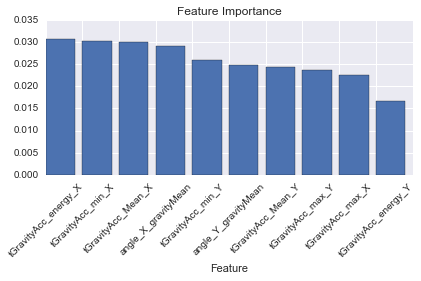

In [12]:
# plt.figure(figsize=(16,4))
plt.bar(range(0, 10), rank.Score[:10], tick_label = rank.FeatureName[:10]);
plt.xticks(rotation = 45);
plt.title('Feature Importance');
plt.xlabel('Feature')
plt.ylabel('')
plt.tight_layout()
plt.savefig('Feature_Importance_Full', dpi = 100)